<a href="https://colab.research.google.com/github/SachinPrasanth777/flask-app/blob/main/Fraud_Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log 2.csv')
df.head()
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [3]:
df.describe(include = 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,124457.000000,124457,1.244570e+05,124456,1.244560e+05,1.244560e+05,124456,1.244560e+05,1.244560e+05,124456.000000,124456.0
unique,NaN,5,NaN,124455,NaN,NaN,62212,NaN,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1709295811,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,48078,NaN,2,NaN,NaN,79,NaN,NaN,NaN,NaN
mean,8.920945,NaN,1.773613e+05,NaN,9.047501e+05,9.209941e+05,NaN,9.004621e+05,1.185246e+06,0.000964,0.0
std,1.857028,NaN,3.440304e+05,NaN,2.850751e+06,2.887776e+06,NaN,2.391423e+06,2.749984e+06,0.031037,0.0
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,NaN,1.059726e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,NaN,5.785259e+04,NaN,2.009300e+04,0.000000e+00,NaN,2.830632e+04,7.527365e+04,0.000000,0.0
75%,10.000000,NaN,2.180569e+05,NaN,1.952794e+05,2.222311e+05,NaN,6.424462e+05,1.097218e+06,0.000000,0.0


In [4]:
print(df.columns.tolist())
print(df.isnull().sum())
df.drop(['isFlaggedFraud'],axis=1,inplace=True)
df.head(5)

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
step              0
type              0
amount            0
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [5]:
drops = ['nameDest','nameOrig','step']
df.drop(drops,axis=1,inplace=True)
df.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [7]:
df.isnull().sum()
mode = df['isFraud'].mode()[0]
mode1 = df['newbalanceDest'].median()
df['newbalanceDest'].fillna(mode1,inplace=True)
df['isFraud'].fillna(mode,inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df.isnull().sum()

,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


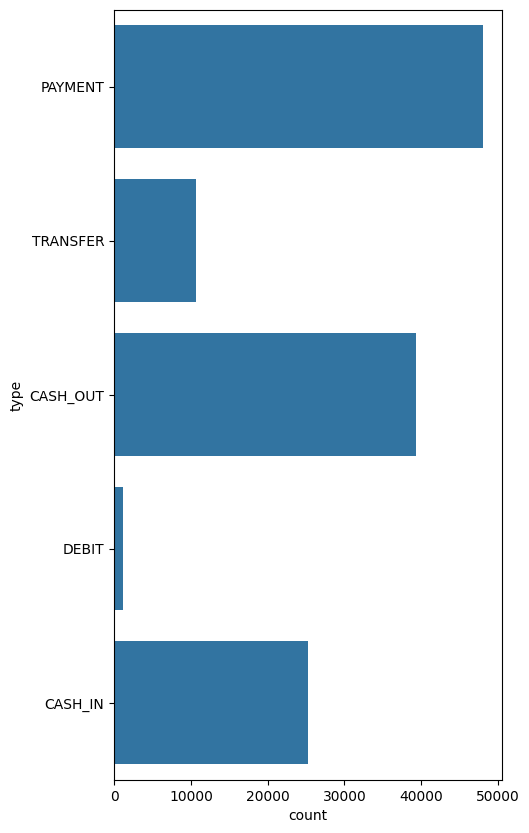

In [8]:
obj = [obj for obj in df.columns if df[obj].dtypes == 'object']
df['type'].value_counts()
plt.figure(figsize=(5,10))
sns.countplot(df['type'])
plt.show()

In [9]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,124337
1.0,120


In [10]:
label_encoder = LabelEncoder()
obj = [obj for obj in df.columns if df[obj].dtypes == 'object']
for cols in obj:
  df[cols] = label_encoder.fit_transform(df[cols])
df.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,3,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [11]:
scaler = StandardScaler()
cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
df[cols] = scaler.fit_transform(df[cols])
df.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,-0.486941,-0.257693,-0.263422,-0.376541,-0.431001,0.0
1,3,-0.510123,-0.309921,-0.312218,-0.376541,-0.431001,0.0
2,4,-0.515016,-0.317312,-0.318931,-0.376541,-0.431001,1.0
3,1,-0.515016,-0.317312,-0.318931,-0.367684,-0.431001,1.0
4,3,-0.481626,-0.302798,-0.308582,-0.376541,-0.431001,0.0


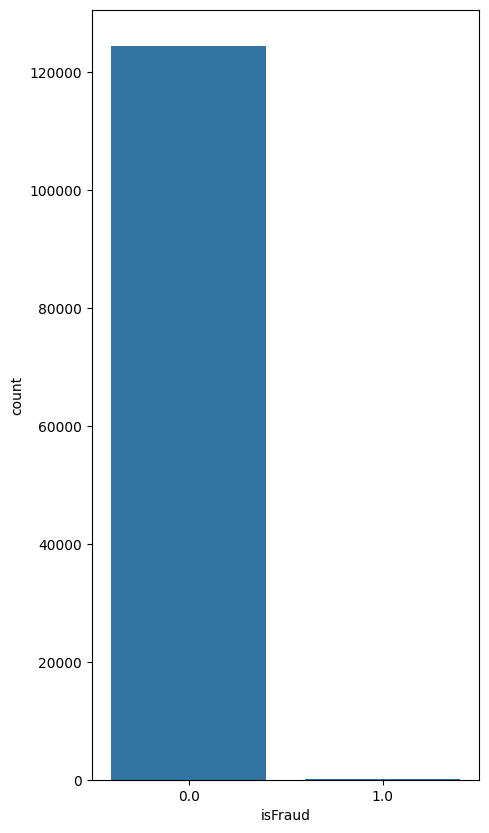

In [12]:
plt.figure(figsize=(5,10))
sns.countplot(x='isFraud',data=df)
plt.show()

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87119, 6)
X_test shape: (37338, 6)
y_train shape: (87119,)
y_test shape: (37338,)


In [15]:
counts = y_train.value_counts()
print("Counts:")
print(counts)
if counts.min()/counts.max()<0.5:
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
  print("After SMOTE Oversampling:")
  print(y_resampled.value_counts())
else:
  X_resampled, y_resampled = X_train, y_train

Counts:
isFraud
0.0    87034
1.0       85
Name: count, dtype: int64
After SMOTE Oversampling:
isFraud
0.0    87034
1.0    87034
Name: count, dtype: int64


In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

def evaluate_models(models, X, y):
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        yield {
            'model_name': model_name,
            'scores': scores,
            'mean_accuracy': np.mean(scores)
        }

for result in evaluate_models(models, X, y):
    print("==" * 30)
    print(result['model_name'])
    print(f"Cross-Validation Scores: {result['scores']}")
    print(f"Mean Accuracy: {result['mean_accuracy']:.4f}")

Logistic Regression
Cross-Validation Scores: [0.99903583 0.99911618 0.9990358  0.9990358  0.9990358 ]
Mean Accuracy: 0.9991
Naive Bayes
Cross-Validation Scores: [0.9910413  0.9439579  0.97930979 0.97701981 0.98103732]
Mean Accuracy: 0.9745
K-Nearest Neighbors
Cross-Validation Scores: [0.99871445 0.99927688 0.99927685 0.99927685 0.99911615]
Mean Accuracy: 0.9991
Decision Tree
Cross-Validation Scores: [0.99907601 0.9993974  0.9991965  0.9991965  0.9990358 ]
Mean Accuracy: 0.9992
Support Vector Machine
Cross-Validation Scores: [0.99903583 0.99903583 0.9990358  0.9990358  0.9990358 ]
Mean Accuracy: 0.9990
Random Forest
Cross-Validation Scores: [0.99935722 0.99951792 0.9993572  0.9993572  0.99939737]
Mean Accuracy: 0.9994


In [21]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9969200278536612


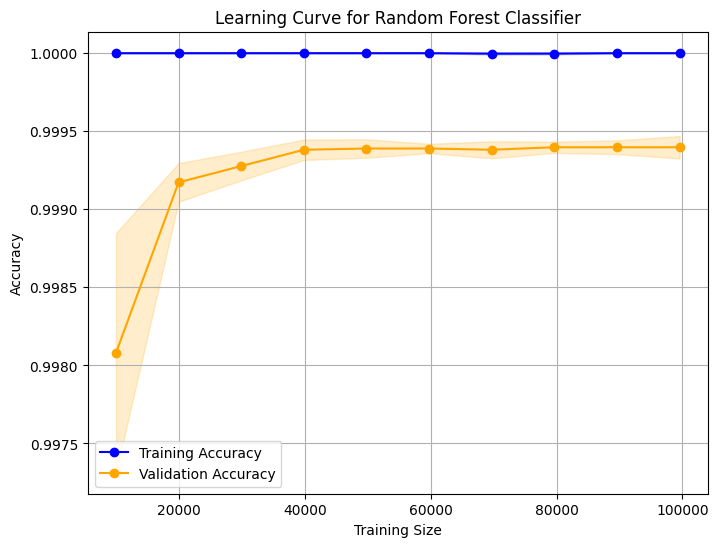

In [26]:
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()

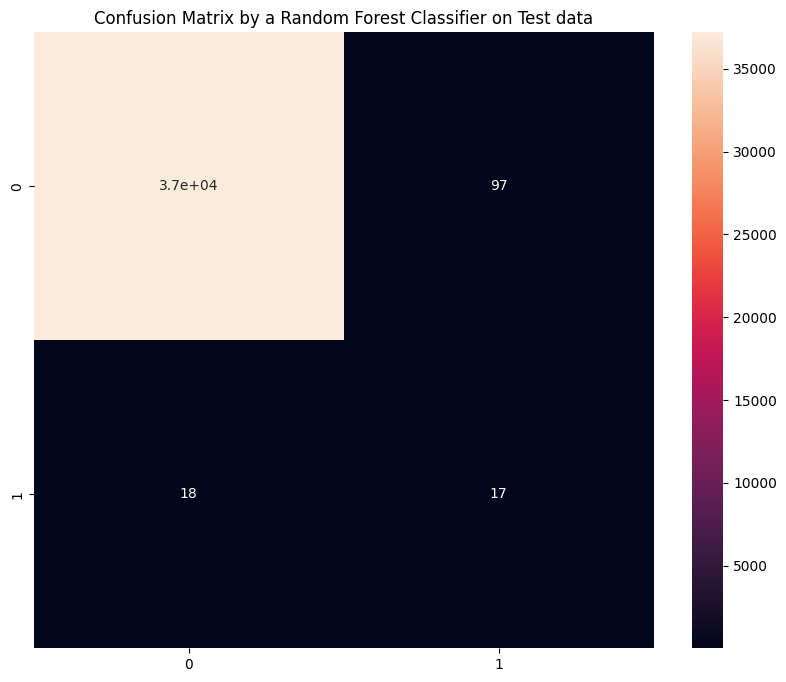

In [25]:
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix by a Random Forest Classifier on Test data")
plt.show()